
--- Peptide Overlap (All PSMs) ---
Metagenomics PSM:     7901 unique peptides
DIAMOND Proteome DB:  4545 unique peptides
Pept2LCA Genus DB:    4235 unique peptides


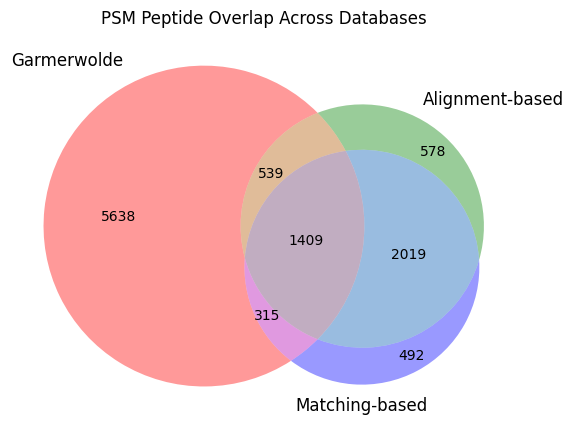

In [ ]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# === File paths ===
metagenomics_psm_taxa_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\metagenomics_psm_taxa_annotated.csv"
diamond_df_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\diamond_from_proteomes_clust95_psm.csv"
genus_df_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\genus_composition_psm.csv"

# === Load data ===
df_meta = pd.read_csv(metagenomics_psm_taxa_csv)
df_diamond = pd.read_csv(diamond_df_csv)
df_genusdb = pd.read_csv(genus_df_csv)

# === Extract peptide sequences ===
# You may need to adjust the exact column names if different
meta_peptides = set(df_meta['Peptide'].dropna().unique())
diamond_peptides = set(df_diamond['Peptide'].dropna().unique())
genusdb_peptides = set(df_genusdb['Peptide'].dropna().unique())

# === Print basic info ===
print("\n--- Peptide Overlap (All PSMs) ---")
print(f"Metagenomics PSM:     {len(meta_peptides)} unique peptides")
print(f"DIAMOND Proteome DB:  {len(diamond_peptides)} unique peptides")
print(f"Pept2LCA Genus DB:    {len(genusdb_peptides)} unique peptides")

# === Plot Venn diagram ===
plt.figure(figsize=(6, 6))
venn3([meta_peptides, diamond_peptides, genusdb_peptides],
      set_labels=("Garmerwolde", "Alignment-based", "Matching-based"))
plt.title("PSM Peptide Overlap Across Databases")
plt.tight_layout()
plt.show()


#### Peptide Overlap Across All PSMs

The Venn diagram above illustrates the overlap of unique peptide sequences (PSMs) identified by three different database strategies:

- The **Metagenomics PSM** dataset produced the highest peptide diversity, with **7901 unique peptides**, reflecting its high sample specificity and ability to capture novel or uncultured taxa.
- The **DIAMOND Proteome DB** contributed **4545 peptides**, providing a strong backbone of reference-matched identifications based on known proteomes.
- The **Pept2LCA Genus DB**, a smaller custom database derived from de novo peptides, yielded **4235 peptides**, tailored more closely to observed taxonomic signals.

#### Overlap and Agreement

- A total of **1409 peptides** were shared across **all three datasets**, forming a high-confidence core of commonly identified sequences.
- The overlap between **Metagenomics PSM** and **DIAMOND DB** (1409 shared + 539 additional) indicates moderate agreement, but also significant divergence.
- **DIAMOND and Pept2LCA DBs** shared **2019 peptides**, suggesting that both approaches capture reference-aligned spectra well.
- Interestingly, **Pept2LCA DB and Metagenomics** shared only **315 peptides**, likely due to differing inference strategies.
- The **Metagenomics dataset** had the largest number of unique (non-overlapping) peptides (**5638**), possibly reflecting sample-specific taxa or noise from overfitting to its own assembly.

#### Implications for Coverage and Specificity

- The **Metagenomics PSM dataset** shows the **broadest peptide coverage**, suitable for sample-resolved investigations, but may also include low-confidence hits or peptides from rare/fragmented proteins.
- The **DIAMOND DB** offers a solid balance between sensitivity and specificity but may under-represent peptides from novel taxa absent in public proteomes.
- **Pept2LCA**, while smaller, overlaps heavily with DIAMOND and includes unique peptides, demonstrating the added value of custom taxon-inferred databases for refining peptide-spectrum match interpretation.

> Together, these results highlight the **complementary nature of the databases** and justify integrating multiple identification strategies to **maximize metaproteome recovery** while managing false positive risks.
